In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

| 表の名前 |意味|　変数 |
| ---| --- | --- |
| ID| kickstarter上で管理するための番号 | カテゴリ |
| name | プロジェクト名| カテゴリ |
| category| main_categoryよりも細かい分類 | カテゴリ |
| main_category | 分類 |  カテゴリ |
| currency | 募集した通過の単位 | カテゴリ　 |
| deadline | 締め切り | カテゴリ |
| goal | 目標金額 | 量的 |
| launched | 開始日　| カテゴリ |
| pleaged | 集まった金額 | 量的 |
| state | プロジェクトが成功したか（これを推定) | カテゴリ |
| backers | 支援者数 | 量的　|
| country | 国 | カテゴリ |
| usd pledged | 公募された金額のUSD　| 量的 |
| usd_pleadged_real | Fixer.ioを通じて得られた公募された金額のUSD | 量的 |
| usd goal_real | Fixer.ioを通じて得られた公募された目標金額のUSD | 量的 |

In [2]:
df_kickstarter = pd.read_csv("ks-projects-201801.csv")

display(df_kickstarter.head())
df_kickstarter.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [3]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df_kickstarter.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df_row,df_col = df_kickstarter.shape

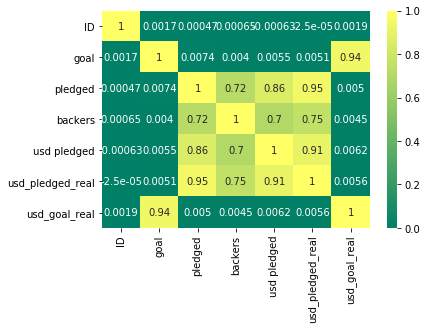

In [6]:
sns.heatmap(df_kickstarter.corr(),cmap="summer",annot=True)
plt.show()

# 変数の選定
 * ID kicstarter上で管理するための番号なので目標達成に関係ないと予想
 * 為替による影響を無視するためにusd_pleaged_realとusd_goal_realを公募された金額、目標公募金額として採用
 → ID,goal,pleaged,usd pleaged,を削除
 

In [7]:
df = df_kickstarter.drop(["ID","goal","pledged","usd pledged"],axis=1)
display(df.head())

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [8]:
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [9]:
df_successful_index = df[df["state"] == "successful"]
df_failed_index = df[df["state"] == "failed"]
df_two_values = pd.concat([df_successful_index,df_failed_index])
df_two_values["state"].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

In [10]:
df_two_values.isnull().sum()

name                3
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

 ## 欠損値の処理
欠損値がある行は削除

In [11]:
df_two_values = df_two_values.dropna(how='any')
df_two_values.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## カテゴリ変数を数値化
name以外のカテゴリ変数を数値に変換する

In [12]:
le = LabelEncoder()

le = le.fit(df_two_values["category"])
df_two_values["category"] = le.transform(df_two_values["category"])

e = le.fit(df_two_values["main_category"])
df_two_values["main_category"] = le.transform(df_two_values["main_category"])

e = le.fit(df_two_values["currency"])
df_two_values["currency"] = le.transform(df_two_values["currency"])

e = le.fit(df_two_values["state"])
df_two_values["state"] = le.transform(df_two_values["state"])

e = le.fit(df_two_values["country"])
df_two_values["country"] = le.transform(df_two_values["country"])
display(df_two_values.head())

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
5,Monarch Espresso Bar,123,7,13,2016-04-01,2016-02-26 13:38:27,1,224,22,52375.00,50000.00
6,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,2014-12-01 18:30:44,1,16,22,1205.00,1000.00
11,Lisa Lim New CD!,72,10,13,2013-04-08,2013-03-09 06:42:58,1,100,22,12700.00,12500.00
14,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,2017-04-05 19:44:18,1,761,9,121857.33,6469.73
18,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,2012-08-02 14:11:32,1,7,22,250.00,250.00


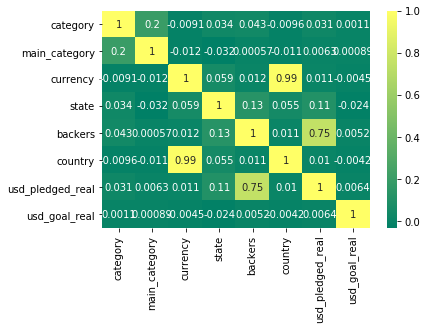

In [13]:
sns.heatmap(df_two_values.corr(),cmap="summer",annot=True)
plt.show()

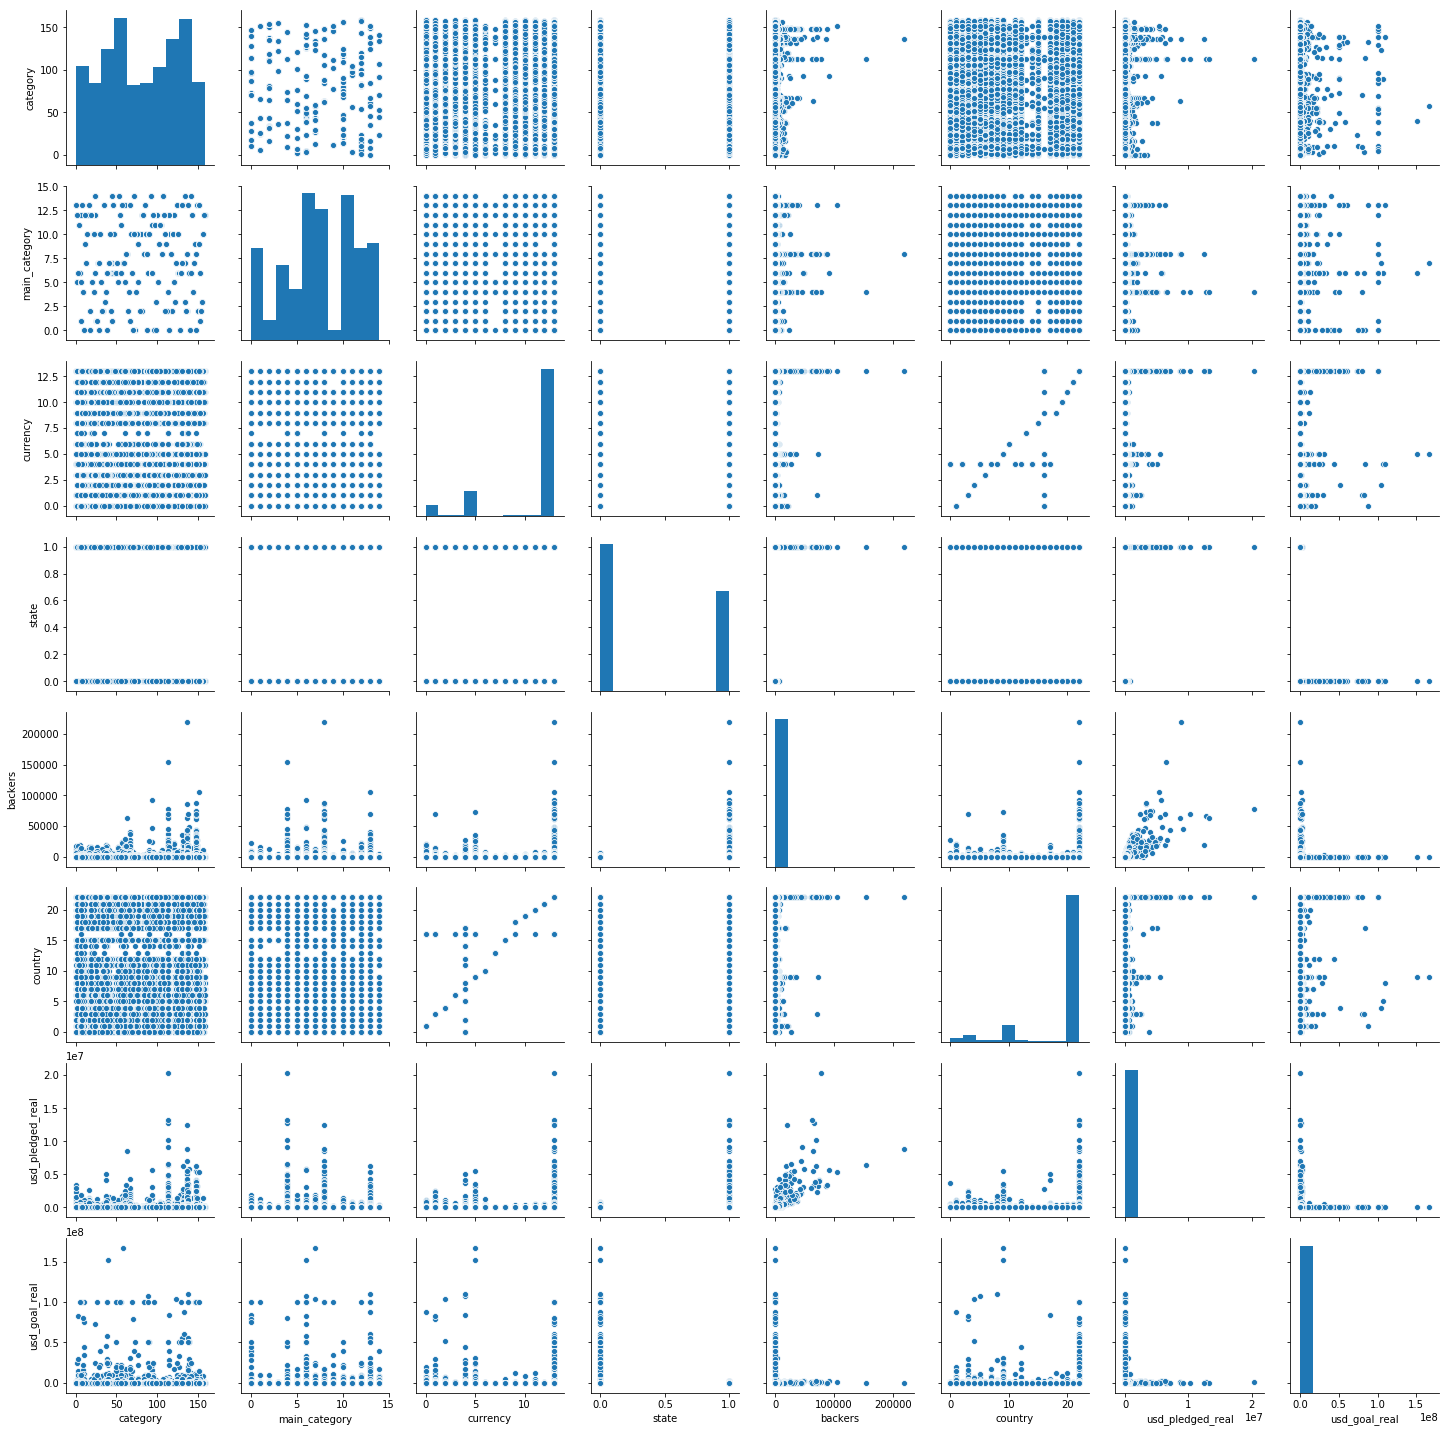

In [14]:
sns.pairplot(df_two_values)
plt.show()

*相関係数が少しだけあるbackersとusd_pledged_realを用いてロジスティック回帰
とりあえずbankersとusd_pledged_realに関してカテゴライズ化

[   0.    2.   15.   63. 1631.]
219382


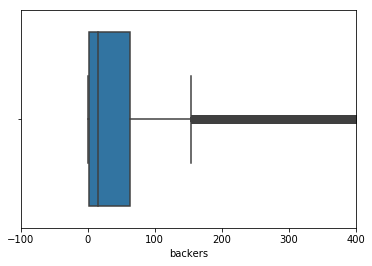

In [15]:
sns.boxplot(df_two_values["backers"])
plt.xlim([-100,400])
c_array = np.percentile(df_two_values["backers"], q=[0, 25, 50, 75, 99])
print(c_array)
print(np.max(df_two_values["backers"]))

banckersに関してデータを分割
* 0~2
* 2~15
* 15~63
* 63~160
* 160~

In [16]:
df_two_values["backers_band"] = pd.cut(df_two_values["backers"],[0,2,15,63,160,219383],labels = range(5),right=False)
display(df_two_values["backers_band"].value_counts())

1    96108
2    83548
0    68582
3    45597
4    37837
Name: backers_band, dtype: int64

[0.0000000e+00 5.0000000e+01 7.8800000e+02 4.6080000e+03 1.3538072e+05]
20338986.27


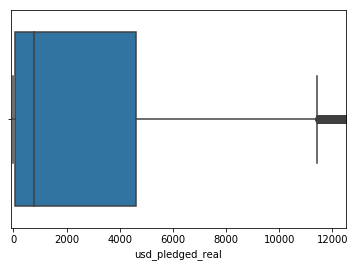

In [17]:
sns.boxplot(df_two_values["usd_pledged_real"])
plt.xlim([-100,12500])
c_array = np.percentile(df_two_values["usd_pledged_real"], q=[0, 25, 50, 75, 99])
print(c_array)
print(np.max(df_two_values["usd_pledged_real"]))

usd_pledged_realに関してデータを分割
* 0~50
* 50~788
* 788~4608
* 4608~12000
* 12000~

In [18]:
df_two_values["usd_pledged_real_band"] = pd.cut(df_two_values["usd_pledged_real"],[0,50,788,4608,12000,20338987],labels = range(5),right=False)
display(df_two_values["usd_pledged_real_band"].value_counts())
display(df_two_values.head())

1    83179
2    82927
0    82646
3    42402
4    40518
Name: usd_pledged_real_band, dtype: int64

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,backers_band,usd_pledged_real_band
5,Monarch Espresso Bar,123,7,13,2016-04-01,2016-02-26 13:38:27,1,224,22,52375.00,50000.00,4,4
6,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,2014-12-01 18:30:44,1,16,22,1205.00,1000.00,2,2
11,Lisa Lim New CD!,72,10,13,2013-04-08,2013-03-09 06:42:58,1,100,22,12700.00,12500.00,3,4
14,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,2017-04-05 19:44:18,1,761,9,121857.33,6469.73,4,4
18,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,2012-08-02 14:11:32,1,7,22,250.00,250.00,1,1





# 最初にロジスティック回帰

In [19]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers_band", "usd_pledged_real_band"]].values

# 各特徴量を平均0，分散1となるような前処理（標準化，詳しくはDAY2にて）を施すためのクラス
# 今回のデータセットは特徴量の平均や分散がそれぞれで大きく異なるため， 確率値がうまく算出されないことが事前検証でわかっている
#std_scaler = StandardScaler() 

# fit_transform関数で標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
#X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -3.815, w1 = 1.186, w2 = 0.705


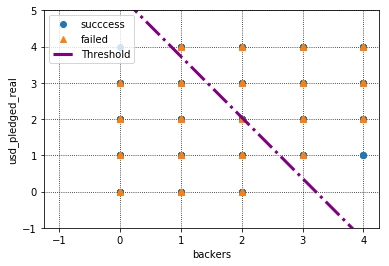

In [20]:
x1 = X[:,0] # 標準化されたbackers
x2 = X[:,1] # 標準化されたusd_pledged_real



# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

plt.plot(x1[y==1], x2[y==1], 'o', color='C0', label="succcess")
plt.plot(x1[y==0], x2[y==0], '^', color='C1', label='failed')
# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2)-1,np.max(x2)+1])
plt.legend(loc='best')

plt.xlabel("backers")
plt.ylabel("usd_pledged_real")
plt.show()

* データの分離がうまくいっていない。
* Threshholdが変な位置にある。

In [21]:
# ラベルを予測
y_est = clf.predict(X)

# 確率値を得る
y_est_proba = clf.predict_proba(X)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -123940.823
対数尤度 = -123940.823
正答率 = 79.997%


In [22]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
conf_mat

,予測 = failed,予測 = succcess
正解 = failed,182998,14718
正解 = success,51628,82328


# ここからDAY２
---

### 外れ値による影響を削除するためにグルーピングを行なったがあまりうまくいかなかった。これからデータに対して標準化や正規化を行い精度の向上を測る
* ホールドアウト
* 交差検証
* 標準化
* 正規化

以上を行いロジスティック回帰を行う。
データはグルーピングする前のもので行う。


In [23]:
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 標準化＋ホールドアウト

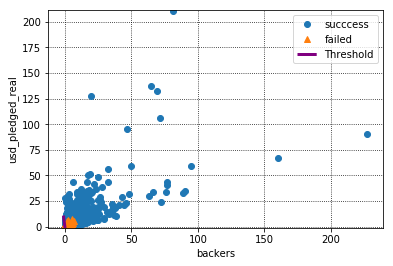

In [34]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values

# 各特徴量を平均0，分散1となるような前処理（標準化，詳しくはDAY2にて）を施すためのクラス
# 今回のデータセットは特徴量の平均や分散がそれぞれで大きく異なるため， 確率値がうまく算出されないことが事前検証でわかっている
std_scaler = StandardScaler() 

# fit_transform関数で標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
X_scaled = std_scaler.fit_transform(X)

test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_train, y_train)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]

x1 = X_train[:,0] # 標準化されたbackers
x2 = X_train[:,1] # 標準化されたusd_pledged_real

# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

plt.plot(x1[y_train==1], x2[y_train==1], 'o', color='C0', label="succcess")
plt.plot(x1[y_train==0], x2[y_train==0], '^', color='C1', label='failed')
# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2)-1,np.max(x2)+1])
plt.legend(loc='best')

plt.xlabel("backers")
plt.ylabel("usd_pledged_real")
plt.show()

In [35]:
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y_test)):
    l += y_test[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y_test[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -31610.824
対数尤度 = -31609.819
正答率 = 79.178%


In [36]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
conf_mat

,予測 = failed,予測 = succcess
正解 = failed,37340,2421
正解 = success,11391,15183


## 正規化＋ホールドアウト

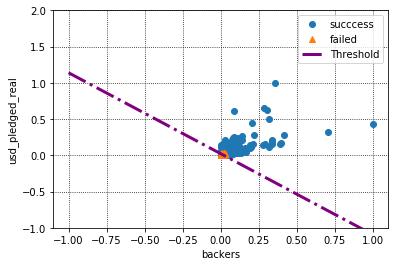

In [37]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values


mms = MinMaxScaler()
X_mms = mms.fit_transform(X)


test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_train, y_train)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]

x1 = X_train[:,0] # 標準化されたbackers
x2 = X_train[:,1] # 標準化されたusd_pledged_real

# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

plt.plot(x1[y_train==1], x2[y_train==1], 'o', color='C0', label="succcess")
plt.plot(x1[y_train==0], x2[y_train==0], '^', color='C1', label='failed')
# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2)-1,np.max(x2)+1])
plt.legend(loc='best')

plt.xlabel("backers")
plt.ylabel("usd_pledged_real")
plt.show()

In [38]:
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y_test)):
    l += y_test[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y_test[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -44199.722
対数尤度 = -44199.722
正答率 = 60.576%


In [39]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
conf_mat

,予測 = failed,予測 = succcess
正解 = failed,39754,7
正解 = success,26145,429


## 正規化と標準化の比較
正規化と標準化を比較すると正規化の方が値のばらつきが小さいが標準化の方が性能がいい。
標準化の方は元データの値の性質を反映したまま値を考慮することができる。

----- 
## 標準化と交差検証

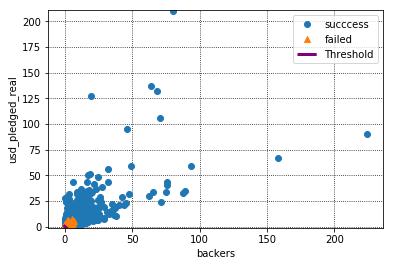

対数尤度 = -31893.707
対数尤度 = -31893.252
正答率 = 78.315%


,予測 = failed,予測 = succcess
正解 = failed,37597,2164
正解 = success,12221,14353


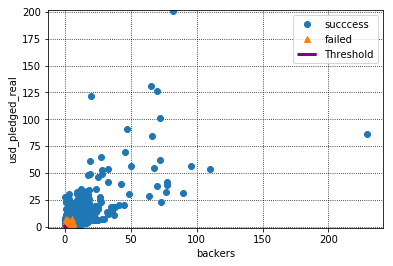

対数尤度 = -31473.374
対数尤度 = -31472.922
正答率 = 78.764%


,予測 = failed,予測 = succcess
正解 = failed,37224,2226
正解 = success,11861,15024


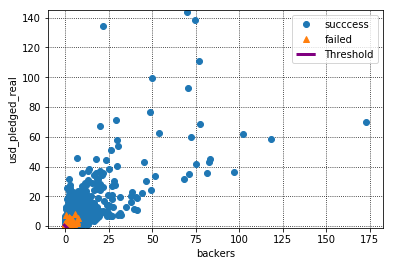

対数尤度 = -33534.869
対数尤度 = -33534.375
正答率 = 81.987%


,予測 = failed,予測 = succcess
正解 = failed,35730,3642
正解 = success,8307,18655


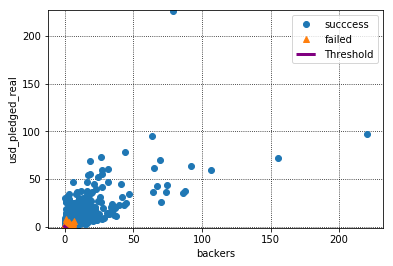

対数尤度 = -31979.894
対数尤度 = -31979.216
正答率 = 78.596%


,予測 = failed,予測 = succcess
正解 = failed,37179,2224
正解 = success,11974,14957


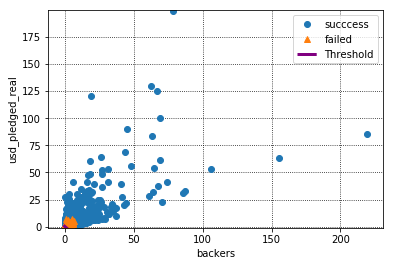

対数尤度 = -32609.711
対数尤度 = -32607.931
正答率 = 78.513%


,予測 = failed,予測 = succcess
正解 = failed,37542,2188
正解 = success,12065,14539


Cross Validation accuracy = 79.235


In [40]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values

n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_accuracy = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    std_scaler = StandardScaler() 
    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.fit_transform(X_test)
    

    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
    clf.fit(X_train, y_train)

    x1 = X_train[:,0] # 標準化されたbackers
    x2 = X_train[:,1] # 標準化されたusd_pledged_real

    # データをプロット
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')

    plt.plot(x1[y_train==1], x2[y_train==1], 'o', color='C0', label="succcess")
    plt.plot(x1[y_train==0], x2[y_train==0], '^', color='C1', label='failed')
    # 境界線をプロットして表示
    # 紫：境界線
    line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
    line_y = - line_x * w1 / w2 - w0 / w2
    plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
    plt.ylim([np.min(x2)-1,np.max(x2)+1])
    plt.legend(loc='best')

    plt.xlabel("backers")
    plt.ylabel("usd_pledged_real")
    plt.show()
    
    # ラベルを予測
    y_est = clf.predict(X_test)

    # 確率値を得る
    y_est_proba = clf.predict_proba(X_test)

    # 対数尤度を表示
    # log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
    # normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
    print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

    # 自分で対数尤度を計算
    l = 0
    epsilon = 1e-15
    for i in range(len(y_test)):
        l += y_test[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y_test[i]) * np.log(y_est_proba[i,0] + epsilon)
    print('対数尤度 = {:.3f}'.format(l))

    # 正答率を表示
    print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))
    
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
    display(conf_mat)
    
    cross_valid_accuracy +=accuracy_score(y_test,y_est)*100
    split_num += 1
    
final_accuracy = cross_valid_accuracy/n_split
print("Cross Validation accuracy = %s"%round(final_accuracy,3))


## 正規化と交差検証

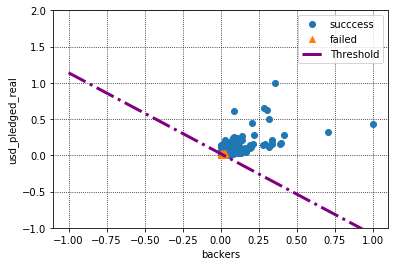

対数尤度 = -43645.826
対数尤度 = -43645.826
正答率 = 61.185%


,予測 = failed,予測 = succcess
正解 = failed,39751,10
正解 = success,25738,836


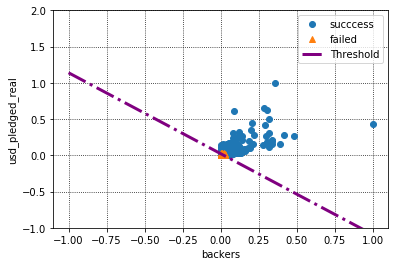

対数尤度 = -43812.313
対数尤度 = -43812.313
正答率 = 60.615%


,予測 = failed,予測 = succcess
正解 = failed,39440,10
正解 = success,26116,769


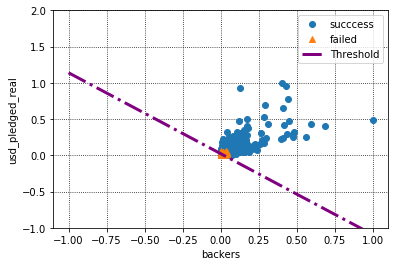

対数尤度 = -44194.926
対数尤度 = -44194.926
正答率 = 60.021%


,予測 = failed,予測 = succcess
正解 = failed,39369,3
正解 = success,26517,445


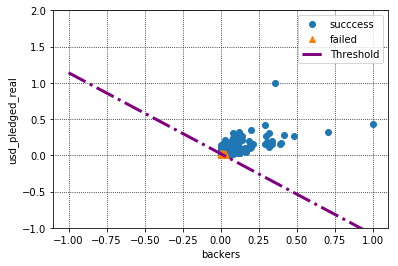

対数尤度 = -43801.413
対数尤度 = -43801.413
正答率 = 60.655%


,予測 = failed,予測 = succcess
正解 = failed,39387,16
正解 = success,26083,848


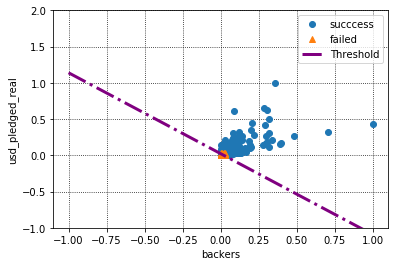

対数尤度 = -43417.777
対数尤度 = -43417.777
正答率 = 61.653%


,予測 = failed,予測 = succcess
正解 = failed,39699,31
正解 = success,25406,1198


Cross Validation accuracy = 60.826


In [41]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values

n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_accuracy = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    mms = MinMaxScaler()
    X_train = mms.fit_transform(X_train)
    X_test = mms.fit_transform(X_test)

    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
    clf.fit(X_train, y_train)

    x1 = X_train[:,0] # 標準化されたbackers
    x2 = X_train[:,1] # 標準化されたusd_pledged_real

    # データをプロット
    plt.grid(which='major',color='black',linestyle=':')
    plt.grid(which='minor',color='black',linestyle=':')

    plt.plot(x1[y_train==1], x2[y_train==1], 'o', color='C0', label="succcess")
    plt.plot(x1[y_train==0], x2[y_train==0], '^', color='C1', label='failed')
    # 境界線をプロットして表示
    # 紫：境界線
    line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
    line_y = - line_x * w1 / w2 - w0 / w2
    plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
    plt.ylim([np.min(x2)-1,np.max(x2)+1])
    plt.legend(loc='best')

    plt.xlabel("backers")
    plt.ylabel("usd_pledged_real")
    plt.show()
    
    # ラベルを予測
    y_est = clf.predict(X_test)

    # 確率値を得る
    y_est_proba = clf.predict_proba(X_test)

    # 対数尤度を表示
    # log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
    # normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
    print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

    # 自分で対数尤度を計算
    l = 0
    epsilon = 1e-15
    for i in range(len(y_test)):
        l += y_test[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y_test[i]) * np.log(y_est_proba[i,0] + epsilon)
    print('対数尤度 = {:.3f}'.format(l))

    # 正答率を表示
    print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))
    
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
    display(conf_mat)
    
    cross_valid_accuracy +=accuracy_score(y_test,y_est)*100
    split_num += 1
    
final_accuracy = cross_valid_accuracy/n_split
print("Cross Validation accuracy = %s"%round(final_accuracy,3))


## 交差検証について
* 標準化<br>
正答率 = 79.178% →　79.235
* 正規化<br>
正答率 = 60.576% →60.826
* 考察<br>
交差検証を行う方は若干正答率は上がったが正直ほとんど変わらない。
しかし汎化性能を見る上では交差検証の方が良いと思われるので交差検証を使っていきたい。

##### 今後の方針として標準化と交差検証を使って分析を進めていく。
------
# SVM
標準化を行なったデータに対して線形カーネルと非線形カーネルを利用した分類を行う。
また、交差検証も行いロジスティック回帰と比較する。

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from common_func import plot_decision_regions
import seaborn as sns

In [ ]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values

n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_accuracy = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
std_scaler = StandardScaler() 
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)
    

# SVMの実行
C = 5
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)
    
plot_decision_regions(X_train, y_train, classifier=clf)
plt.plot(X_test[:,0],X_test[:,1], color="g", marker="o",ls="")
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel("backers")
plt.ylabel("usd_pledged_real")
plt.show()
    
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)
print("識別精度=",clf.score(X_test, y_test))

# 正答率を表示
#print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))
    
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
display(conf_mat)


#### 非線形カーネルをしようしたSVM

In [ ]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_two_values["state"].values
X = df_two_values[["backers", "usd_pledged_real"]].values

n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_accuracy = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
std_scaler = StandardScaler() 
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)
    

# SVMの実行
clf2 = SVC(**clf.best_params_, gamma="scale") # gamma=scaleにすると、gammaが自動で計算される
clf2.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, classifier=clf)
plt.plot(X_test[:,0],X_test[:,1], color="g", marker="o",ls="")
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel("backers")
plt.ylabel("usd_pledged_real")
plt.show()
    
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)
print("識別精度=",clf.score(X_test, y_test))

# 正答率を表示
#print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))
    
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = failed', '正解 = success'], 
                        columns=['予測 = failed', '予測 = succcess'])
display(conf_mat)
